In [ ]:

import pandas as pd
import numpy as np

data_file = "data.csv"
ages_file = "Ages.csv"


data = pd.read_csv(data_file)
ages = pd.read_csv(ages_file)



# Eksik veri kontrolü
print("\nEksik veri kontrolü:")
print("Data.csv eksik değerler:\n", data.isnull().sum())
print("Ages.csv eksik değerler:\n", ages.isnull().sum())

# Veri boyutlarının kontrolü
print("\nData.csv boyut:", data.shape)
print("Ages.csv boyut:", ages.shape)



Eksik veri kontrolü:
Data.csv eksik değerler:
 Sample Accession                                                                                                                                                         0
Sample Accession.1                                                                                                                                                       0
k__Archaea                                                                                                                                                               0
k__Archaea|p__Euryarchaeota                                                                                                                                              0
k__Archaea|p__Euryarchaeota|c__Methanobacteria                                                                                                                           0
                                                                                                 

In [ ]:
# Gereksiz sütun kaldırıldı
data = data.drop(columns=["Sample Accession.1"], errors='ignore')



In [ ]:
#İki veri setinin ortak sütunları bulundu
common_columns = data.columns.intersection(ages.columns)

#Ortak sütunları yazdırıldı
print(common_columns)


Index(['Sample Accession'], dtype='object')


In [ ]:
# Yaş verileri ile mikrobiyom verileri birleştirildi
merged_data = pd.merge(ages, data, on="Sample Accession")



In [ ]:
# Birleştirilen veri kontrol edildi
print("\nBirleştirilen veri ilk birkaç satır:")
print(merged_data.head())



Birleştirilen veri ilk birkaç satır:
  Sample Accession   Age  k__Archaea  k__Archaea|p__Euryarchaeota  \
0     SAMN03283266  32.0    0.000000                     0.000000   
1     SAMN03283281  52.0    0.009764                     0.009764   
2     SAMN03283255  32.0    0.004333                     0.004333   
3     SAMN03283260  35.0    0.010463                     0.010463   
4     SAMN03283250  37.0    0.039591                     0.039591   

   k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
0                                        0.000000   
1                                        0.009764   
2                                        0.004333   
3                                        0.010463   
4                                        0.039591   

   k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
0                                           0.000000                      
1                                           0.009764                      
2  

In [ ]:


# Özellikler (X) ve hedef değişkeni (y) ayırıldı
X = merged_data.iloc[:, 2:]  # Mikrobiyom özellikleri
y = merged_data["Age"]      # Yaş sütunu hedef değişken

# Veri boyutları kontrol edildi
print("\nÖzellik matrisi boyutu:", X.shape)
print("Hedef değişken boyutu:", y.shape)



Özellik matrisi boyutu: (4274, 3200)
Hedef değişken boyutu: (4274,)


In [ ]:
# Sample Accession sütununu kaldırdı, sadece sayısal özellikleri tutuldu
X = data.drop(columns=["Sample Accession"], errors='ignore')

# Hedef değişkeni (yaş) alındı
y = ages["Age"]


In [ ]:
from sklearn.preprocessing import StandardScaler

# Özellikler normalize edildi
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

#Eğitim ve test setlerini ayırıldı
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


In [ ]:

# Ayrılan veri boyutları kontrol edildi
print("\nEğitim seti boyutu (X_train):", X_train.shape)
print("Test seti boyutu (X_test):", X_test.shape)



Eğitim seti boyutu (X_train): (3419, 3200)
Test seti boyutu (X_test): (855, 3200)


MAE (Mean Absolute Error): 11.428110129963157
R-squared (R²): 0.32888689339440624


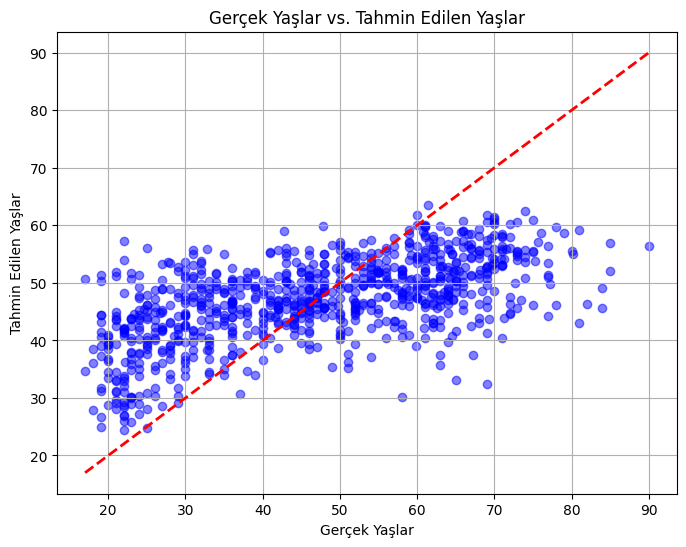

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Model oluşturuldu
model = RandomForestRegressor(random_state=42)

# Modeli eğitildi
model.fit(X_train, y_train)

# Tahmin yapıldı
y_pred = model.predict(X_test)

# Performans metriklerini hesaplandı
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Mean Absolute Error): {mae}")
print(f"R-squared (R²): {r2}")

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Gerçek Yaşlar vs. Tahmin Edilen Yaşlar')
plt.xlabel('Gerçek Yaşlar')
plt.ylabel('Tahmin Edilen Yaşlar')
plt.grid(True)
plt.show()
